## How Tech Professionals’ Preferences Shape Salaries and Job Satisfaction
### Business Understanding 
The StackOverflow Survey gathers data from a large number of people who code. I think it would be a good idea to look at the survey to find out common traits among developers. 
Here are 3 questions I want to answer
1. What characteristics do ‘tech professionals’ have in common?
2. Do the said characteristics influence job satisfaction?
3. Do the said characteristics influence salary?

To answer these questions may help people who are thinking of choosing a career in tech

### Data understanding
First, let's get to know the data we are dealing with. 
- How many rows, columns are there?
- What are the means and deviations?
- Any missing or duplicated data?
- What column has the most missing values?

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import common as t


In [57]:
%matplotlib inline

original_df = pd.read_csv('./survey_results_public.csv')
original_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
original_df.shape

(51392, 154)

In [59]:
#show all the columns 
cols = original_df.columns.to_list()
print(cols)

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

In [60]:
col_types = original_df.dtypes.to_dict()
print(col_types)

{'Respondent': dtype('int64'), 'Professional': dtype('O'), 'ProgramHobby': dtype('O'), 'Country': dtype('O'), 'University': dtype('O'), 'EmploymentStatus': dtype('O'), 'FormalEducation': dtype('O'), 'MajorUndergrad': dtype('O'), 'HomeRemote': dtype('O'), 'CompanySize': dtype('O'), 'CompanyType': dtype('O'), 'YearsProgram': dtype('O'), 'YearsCodedJob': dtype('O'), 'YearsCodedJobPast': dtype('O'), 'DeveloperType': dtype('O'), 'WebDeveloperType': dtype('O'), 'MobileDeveloperType': dtype('O'), 'NonDeveloperType': dtype('O'), 'CareerSatisfaction': dtype('float64'), 'JobSatisfaction': dtype('float64'), 'ExCoderReturn': dtype('O'), 'ExCoderNotForMe': dtype('O'), 'ExCoderBalance': dtype('O'), 'ExCoder10Years': dtype('O'), 'ExCoderBelonged': dtype('O'), 'ExCoderSkills': dtype('O'), 'ExCoderWillNotCode': dtype('O'), 'ExCoderActive': dtype('O'), 'PronounceGIF': dtype('O'), 'ProblemSolving': dtype('O'), 'BuildingThings': dtype('O'), 'LearningNewTech': dtype('O'), 'BoringDetails': dtype('O'), 'JobS

In [61]:
#columns with no missing values
original_df.columns[original_df.isnull().mean() == 0]

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation'],
      dtype='object')

In [62]:
#columns with more than 50% rows of missing values
original_df.columns[original_df.isnull().mean() > 0.5]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'HoursPerWeek',
       'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept',
       'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation',
       'AssessJobOffice', 'AssessJobCommute', 'AssessJobRemote',
       'AssessJobLeaders', 'AssessJobProfDevel', 'AssessJobDiversity',
       'AssessJobProduct', 'AssessJobFinances', 'JobProfile', 'ResumePrompted',
       'LearnedHiring', 'Currency', 'Overpaid', 'EducationImportant',
       'TimeAfterBootcamp', 'CousinEducation', 'HaveWorkedFramework',
       'WantWorkFramework', 'WantWorkDatabase', 'MetricAssess',
       'InfluenceWorkstation', 'InfluenceHardware', 'InfluenceServers',
       'InfluenceTechStack', 'InfluenceDeptTech', 'InfluenceVizTools',
       'Influe

In [63]:
#columns with more than 75% rows of missing values
original_df.columns[original_df.isnull().mean() > 0.75]

Index(['YearsCodedJobPast', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'ExCoderReturn', 'ExCoderNotForMe',
       'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'TimeAfterBootcamp',
       'ExpectedSalary'],
      dtype='object')

In [64]:
original_df.mean()

Respondent                   25696.500000
CareerSatisfaction               7.300574
JobSatisfaction                  6.957078
HoursPerWeek                     3.952282
StackOverflowSatisfaction        8.429875
Salary                       56298.480641
ExpectedSalary               33142.220468
dtype: float64

In [65]:
original_df.std()

Respondent                   14835.736854
CareerSatisfaction               1.955444
JobSatisfaction                  2.167652
HoursPerWeek                     7.564722
StackOverflowSatisfaction        1.390635
Salary                       39880.905277
ExpectedSalary               30162.988829
dtype: float64

### Data preparation
Next, let's select only columns that matter to answer the business questions. 
Drop missing values and impute some columns to get the data in shape 

In [66]:
selected_columns = [
#basic info
'Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 
'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 
#personality info
'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 
'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 
'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'Overpaid',
#measurment variables
'Salary', 'CareerSatisfaction', 'JobSatisfaction'
]

In [67]:
df = original_df[selected_columns]

In [68]:
#Again, check if any columns have more than half missing values
df.columns[df.isnull().mean() > 0.5]

Index(['Overpaid', 'Salary'], dtype='object')

In [69]:
#Since 'Overpaid' (Do you feel being overpaid) is not directly related to ones' trait, so we can drop this column for now
df.drop(columns='Overpaid', inplace=True)

/Users/phuonganhdang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Data analysis
## Part I:
To answer question 1, we need to look at the distribution of the answers to questions related to personal preferences

In [70]:
def clean_and_plot(df, col, plot=False):
    '''
    INPUT 
        df - a dataframe 
        col - the column to group data by
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        perc_df - a dataframe with the percentage of individuals agree or disagree to the statement
        Displays a plot of pretty things related to the input column.
    '''
    group_df = df.groupby(col)['Respondent'].count().sort_values(ascending=False)
    if plot:
        (group_df/group_df.sum()*100).plot(kind='bar', legend=None);
        plt.title(f'Percentage of Answer to {col}');
        plt.show()
    per_df =  group_df/group_df.sum()*100
    per_df.name = col
    # per_df = per_df.rename(columns={'Respondent': col})
    return per_df

In [71]:
personality_indicators = ['BuildingThings', 'LearningNewTech', 'BoringDetails', 
'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 
'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

result_df = clean_and_plot(df, 'ProblemSolving')
for i in personality_indicators:
    # print(clean_and_plot(df, i))
    result_df = pd.concat([clean_and_plot(df, i), result_df], axis=1)

result_df


,ChangeWorld,CompetePeers,ChallengeMyself,DifficultCommunication,InTheZone,EnjoyDebugging,KinshipDevelopers,WorkPayCare,InvestTimeTools,SeriousWork,UnderstandComputers,RightWrongWay,FriendsDevelopers,AnnoyingUI,DiversityImportant,JobSecurity,BoringDetails,LearningNewTech,BuildingThings,ProblemSolving
Agree,29.713916,21.230120,47.115043,8.579622,42.432709,33.052243,42.863657,7.376070,40.723953,48.078287,22.920089,22.827911,23.827157,37.387576,38.866777,41.725352,16.463571,39.777664,36.559518,35.420062
Somewhat agree,29.287215,28.691983,12.479416,21.558704,22.551959,33.982866,33.577617,20.145325,32.247620,15.992777,25.996070,31.932610,25.507937,16.482383,23.826166,25.166453,31.631606,9.717608,6.576167,6.039689
Strongly agree,23.390981,7.474846,38.300345,2.132254,29.311755,10.965900,12.074132,2.638463,15.816227,32.849681,13.869295,12.974438,9.173455,40.201799,25.958645,23.517926,5.047460,48.933044,55.814177,57.648675
Disagree,14.372070,31.817592,1.701592,49.881916,4.841567,17.920376,9.699694,44.911997,10.415722,2.592378,25.883338,24.841854,30.939885,4.841881,7.530013,7.708067,38.064392,1.181958,0.794007,0.572013
Strongly disagree,3.235817,10.785459,0.403603,17.847503,0.862010,4.078616,1.784900,24.928145,0.796477,0.486877,11.331208,7.423186,10.551566,1.086361,3.818400,1.882202,8.792971,0.389727,0.256131,0.319560


In [72]:
Agree = result_df.loc['Agree']
Somewhat_agree = result_df.loc['Somewhat agree']
Strongly_agree = result_df.loc['Strongly agree']
Disagree = result_df.loc['Disagree']
Strongly_disagree = result_df.loc['Strongly disagree']

plot_df = pd.concat([Strongly_agree, Somewhat_agree, Agree, Disagree, Strongly_disagree], axis=1)
plot_df

,Strongly agree,Somewhat agree,Agree,Disagree,Strongly disagree
ChangeWorld,23.390981,29.287215,29.713916,14.372070,3.235817
CompetePeers,7.474846,28.691983,21.230120,31.817592,10.785459
ChallengeMyself,38.300345,12.479416,47.115043,1.701592,0.403603
DifficultCommunication,2.132254,21.558704,8.579622,49.881916,17.847503
InTheZone,29.311755,22.551959,42.432709,4.841567,0.862010
EnjoyDebugging,10.965900,33.982866,33.052243,17.920376,4.078616
KinshipDevelopers,12.074132,33.577617,42.863657,9.699694,1.784900
WorkPayCare,2.638463,20.145325,7.376070,44.911997,24.928145
InvestTimeTools,15.816227,32.247620,40.723953,10.415722,0.796477
SeriousWork,32.849681,15.992777,48.078287,2.592378,0.486877


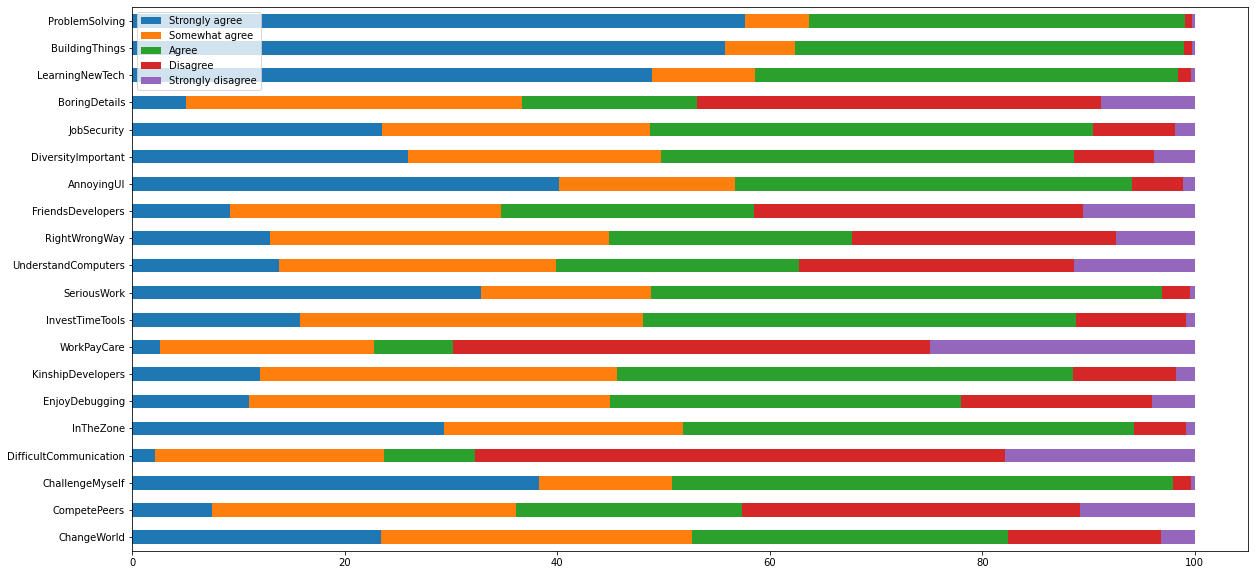

In [73]:
ax = plot_df.plot.barh(stacked=True, figsize=(20,10))
plt.savefig('plot0.png')


##### Answer to Quesion 1
Cool, most developers love to solve problems, build things and learn new tech. 

Now let's look at the corr to dig deeper if there are any correlations between those traits


In [74]:
#Translate agreeness to numeric values so that we can get the correlation
replace_values = {
 'Strongly agree': 5,
 'Somewhat agree': 4, 
 'Agree': 3 ,
 'Disagree': 2,
 'Strongly disagree': 1}

In [75]:
s_df = df.replace(replace_values)
s_df = s_df.set_index('Respondent')

In [76]:
plot_df1 = s_df.dropna(subset=['Salary', 'CareerSatisfaction', 'JobSatisfaction'])


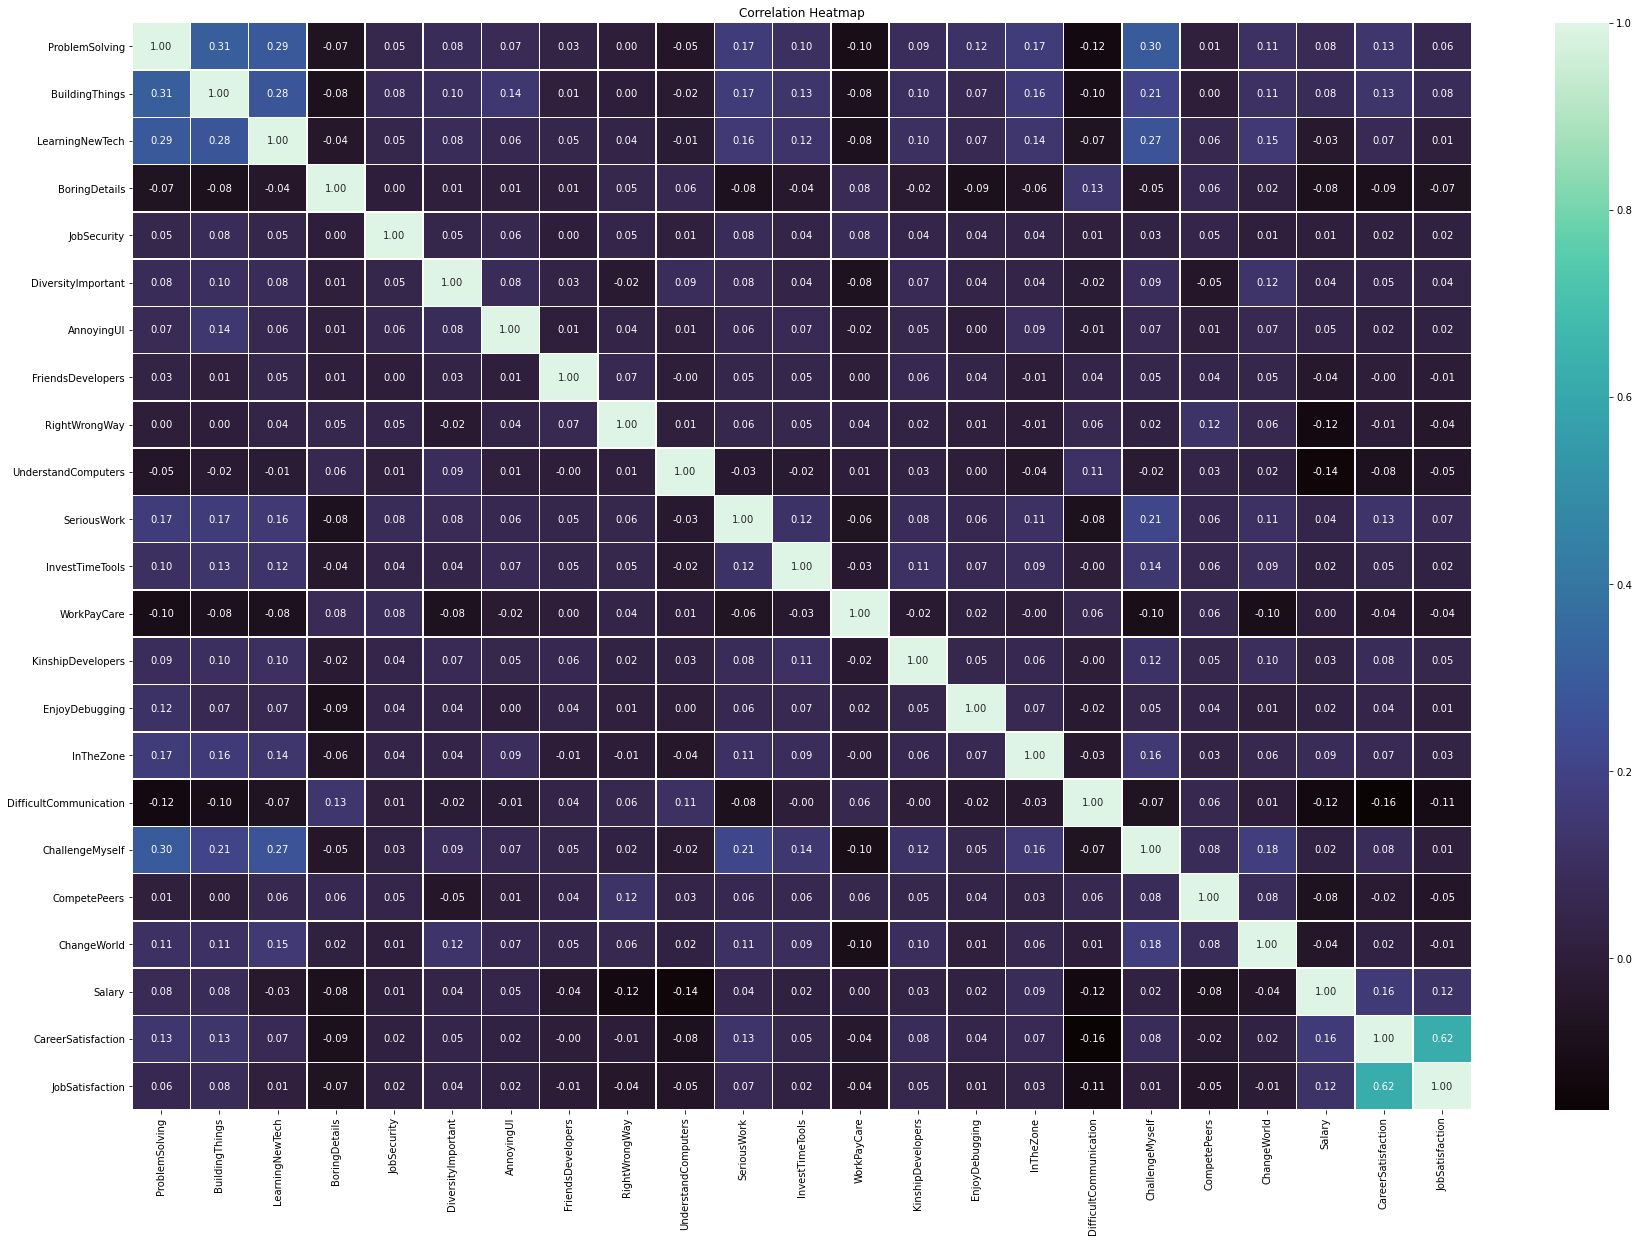

In [77]:
# Calculate the correlation matrix
corr_matrix = plot_df1.corr()
# matrix = np.triu(corr_matrix)


# Set the figure size
plt.figure(figsize=(30, 20))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')


plt.savefig('plot.png')
# Show the plot
plt.show()


##### Answer to Question 1
So problemSolving, BuildingThings, LearningNewTech often come together

## Part II:
To answer question 2, we need to look at the mean job satisfaction by common traits found in Question 1

In [78]:
def mean_col2_by_col1(df, col1, col2='Salary', plot=True):
    df = df.dropna(subset=[col2])
    result_df = df.groupby(col1)[col2].mean().sort_values(ascending=False)
    if plot:
        # Create a bar plot
        plt.figure(figsize=(8, 6))
        plt.bar(result_df.index, result_df.values, color='skyblue')
        plt.xlabel(f"{col1}")
        plt.ylabel(f"Mean {col2}")
        plt.title(f"Mean {col2} by {col1}")
        plt.xticks(rotation=45)

        # Show the plot
        plt.tight_layout()
        plt.savefig(f'img/{col2}_by_{col1}.png')
        plt.show()
    return result_df

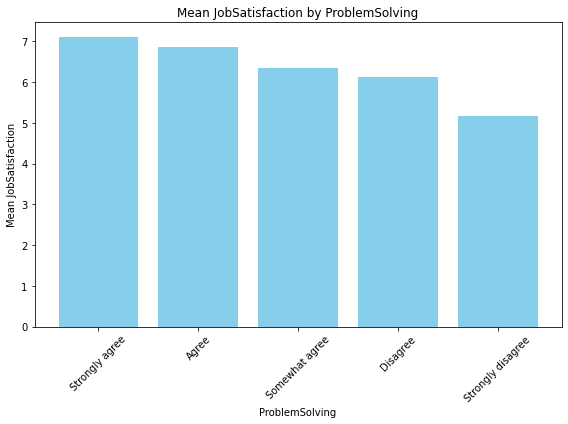

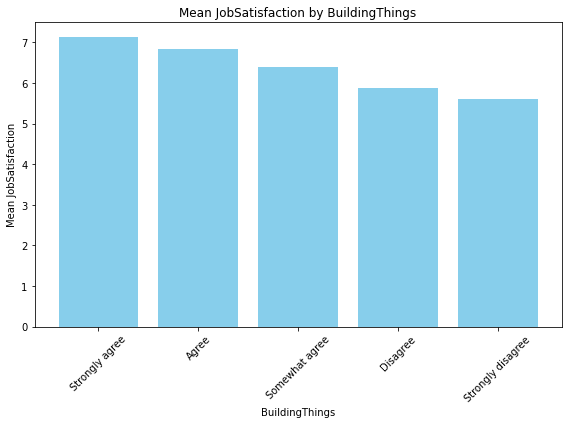

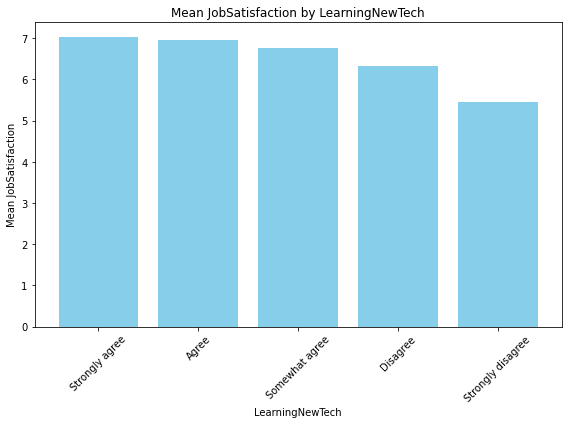

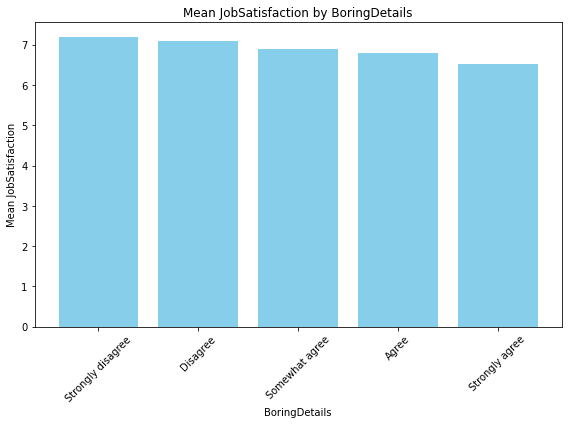

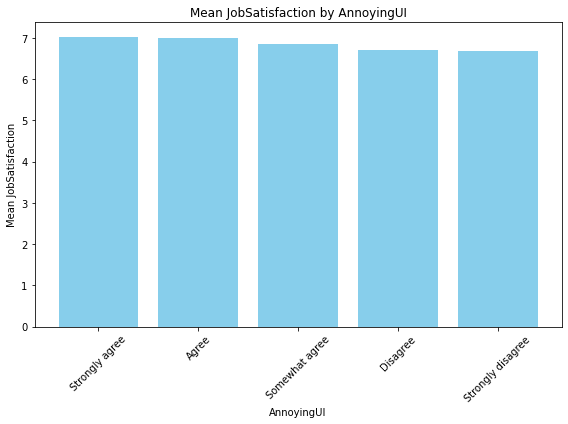

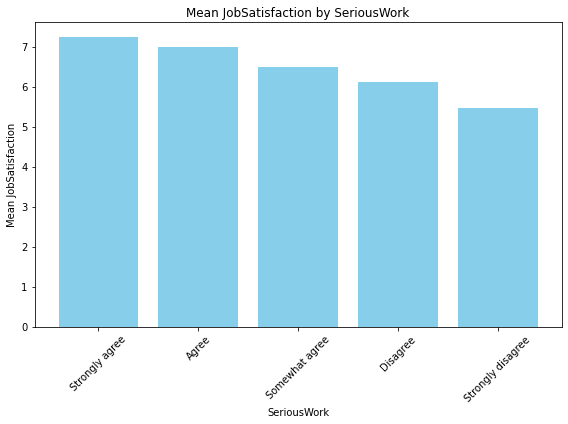

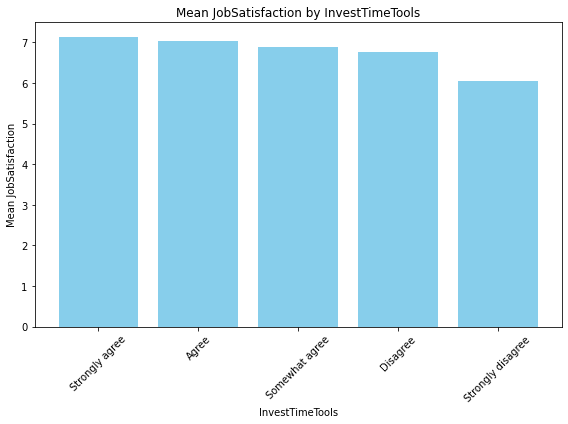

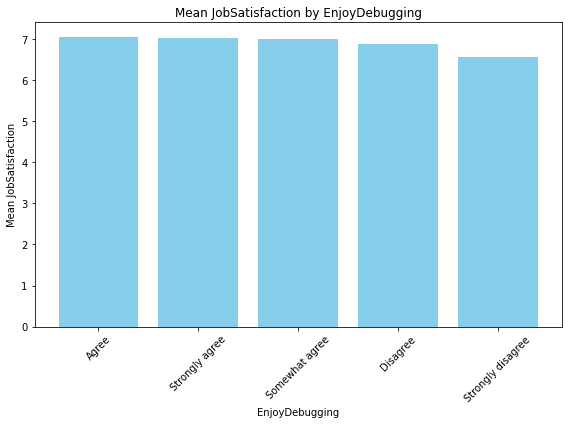

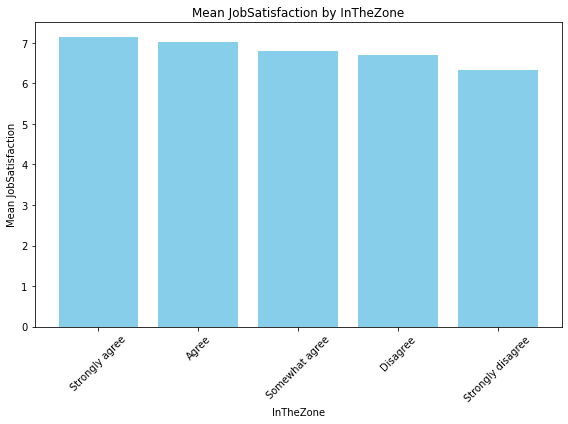

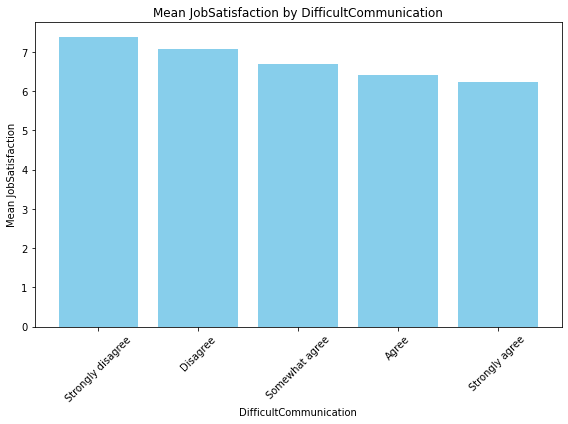

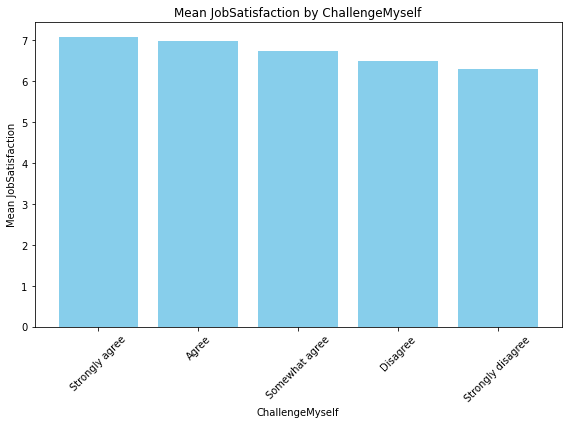

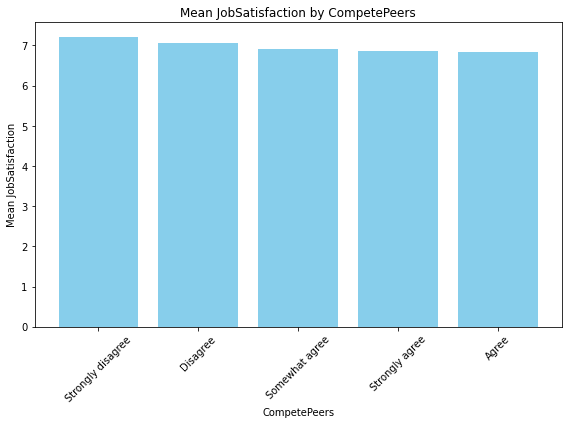

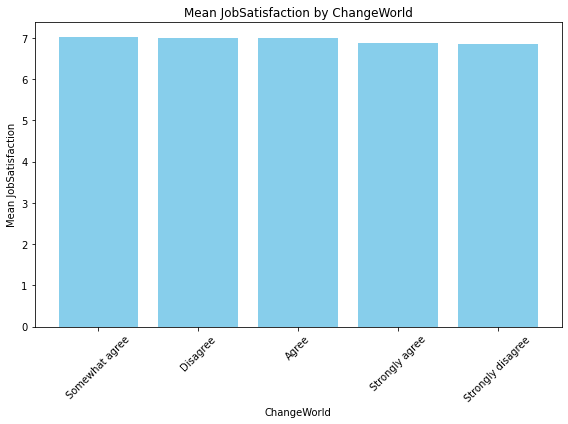

In [79]:
personality_indicators = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'AnnoyingUI',
'SeriousWork', 'InvestTimeTools', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

for i in personality_indicators:
    mean_col2_by_col1(df,i, 'JobSatisfaction')

##### Answer to Quesion 2
Mean Job satisfaction descends as the agreeness descends to the traits of BuildingThings, ProblemSolving

## Part III:
To answer question 3, we need to look at the mean salary by common traits found in Question 1

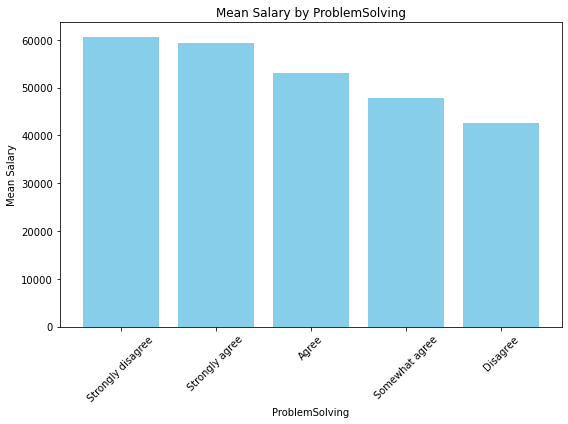

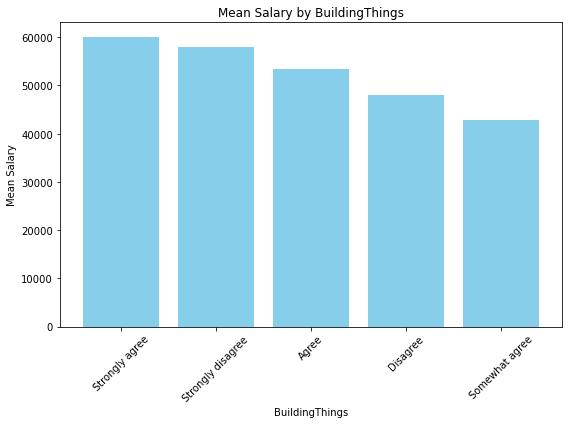

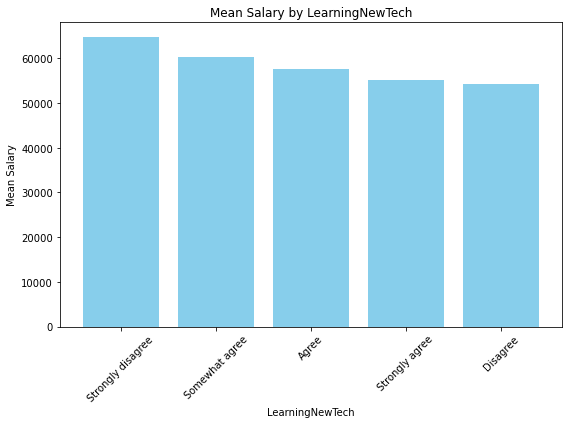

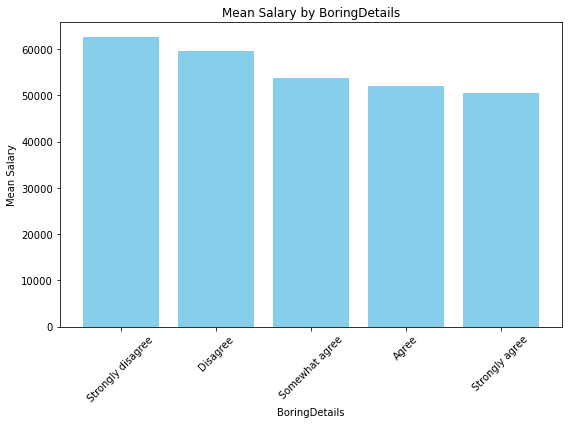

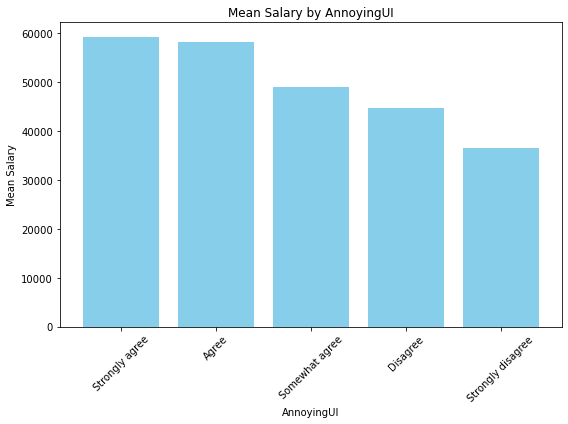

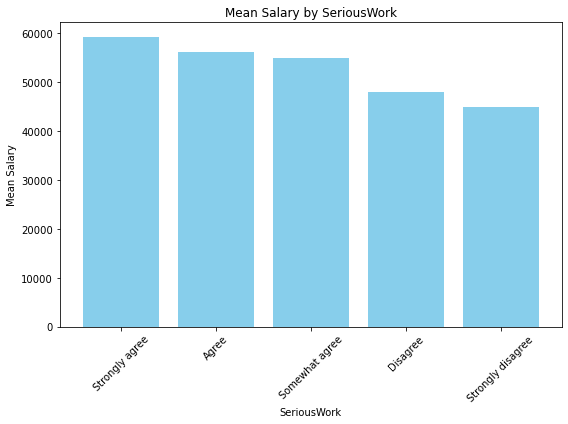

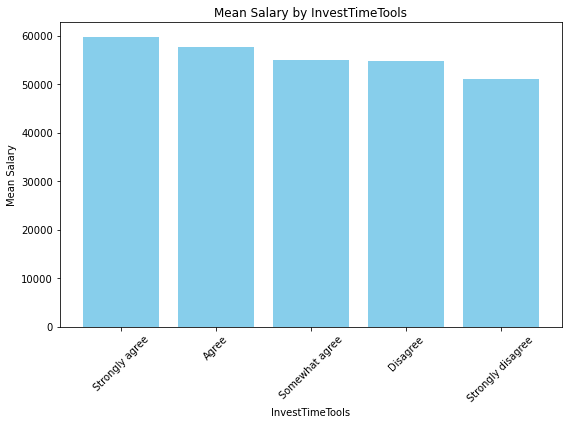

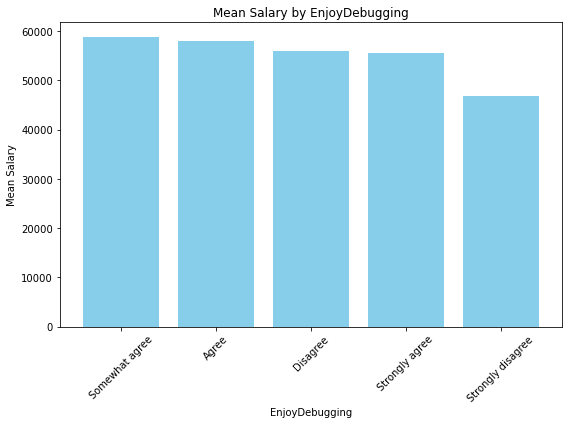

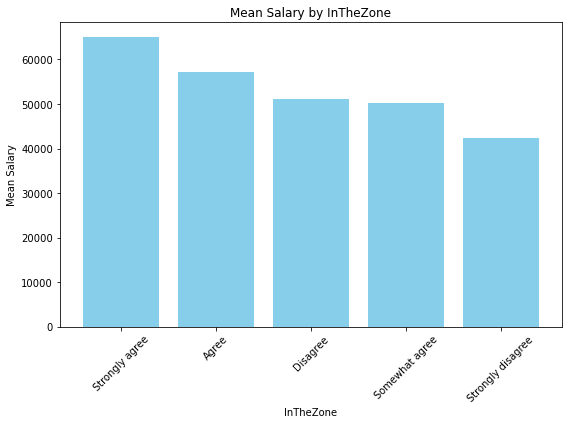

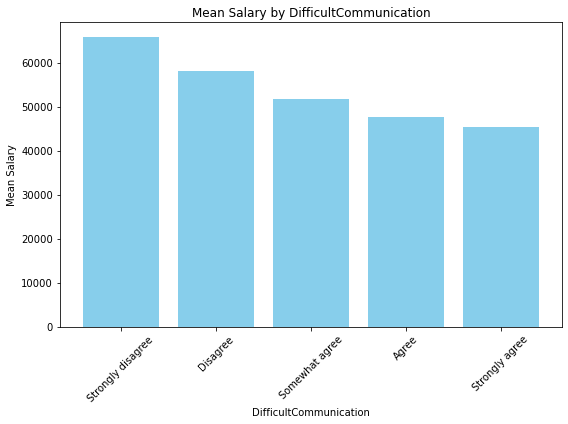

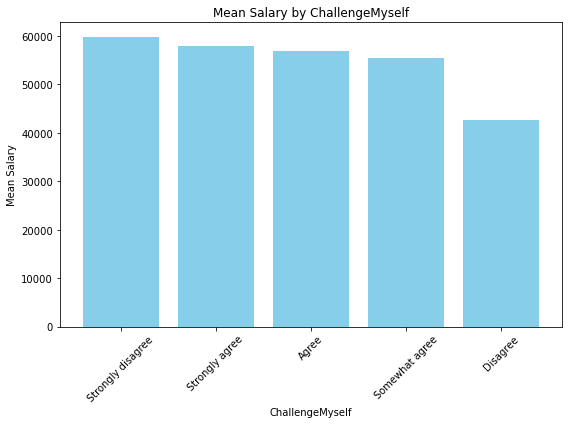

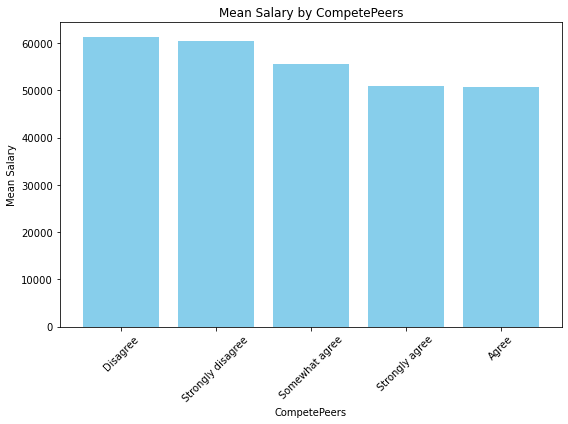

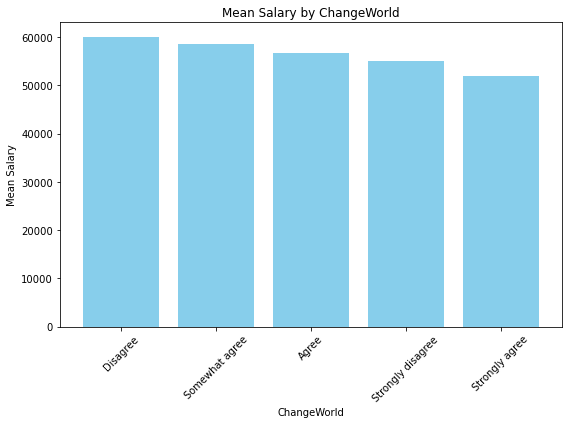

In [80]:
personality_indicators = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'AnnoyingUI',
'SeriousWork', 'InvestTimeTools', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

for i in personality_indicators:
    mean_col2_by_col1(df,i, 'Salary')

##### Answer to Quesion 3
In terms of salary, there is a tight between the two extreme ends. The top earners are more likely to either love or hate problem solving/ building things.

## Bonus:
If traits like BuildingThings, ProblemSolving can't tell much about Salary then what affect Salary?
We will train a linear regression model, find best cutoff in the below section

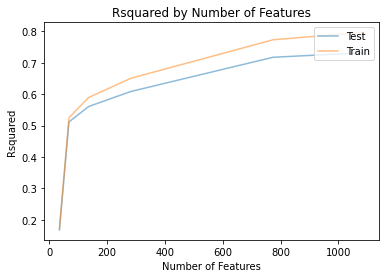

1088
0.7316766986704022
0.7968545363044823


,est_int,coefs,abs_coefs
42,Country_United States,56731.283619,56731.283619
28,Country_Norway,40550.628110,40550.628110
8,Country_Australia,40111.916279,40111.916279
383,Currency_Swiss francs,36748.955151,36748.955151
15,Country_Denmark,30497.628811,30497.628811
123,YearsCodedJob_20 or more years,29980.868555,29980.868555
27,Country_New Zealand,29954.315738,29954.315738
23,Country_Israel,29510.172957,29510.172957
13,Country_Canada,29363.254074,29363.254074
22,Country_Ireland,28551.627756,28551.627756


In [81]:


def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values because we are trying to predict Salary
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(original_df)    


# In[ ]:


#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)


print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2




def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)




##Conclusion 
1. Most developers love building things, solving problems, and learning new tech
2. If the developers have the above trait, they tend to get more job satisfaction
3. The factors that influence salary, however, is not those traits, but factors like the country of residence, YearsCodedJob matter more